# 🚀 Showcase

This is notebook with example usage of pykirill package

## Install pykirill package

In [ ]:
%pip install pykirill

In [1]:
import seaborn as sns
from pykirill import plotting, transforms

plotting.setup()

INFO:pykirill.plotting:Arial font is not available. Defaulting to sans-serif font.
INFO:pykirill.plotting:Before embarking on a journey, 🐗 pykirill foretells a WE'RE REALLY SO BACK mood...


## Load example dataset

In [2]:
dataset = sns.load_dataset("iris")
data = dataset.drop(columns=["species"])
target = dataset["species"]

## Transform data and perform PCA

In [3]:
scaled_data = data.apply(transforms.log_scale)
pca = transforms.principal_component_analysis(scaled_data, n_components=3)
pca

PrincipalComponentAnalysisResult (
	N components: 3
	Explained variance: 0.99
	Scores shape: (150, 3)
	Loadings shape: (4, 3)
)

## Plot PCA scores

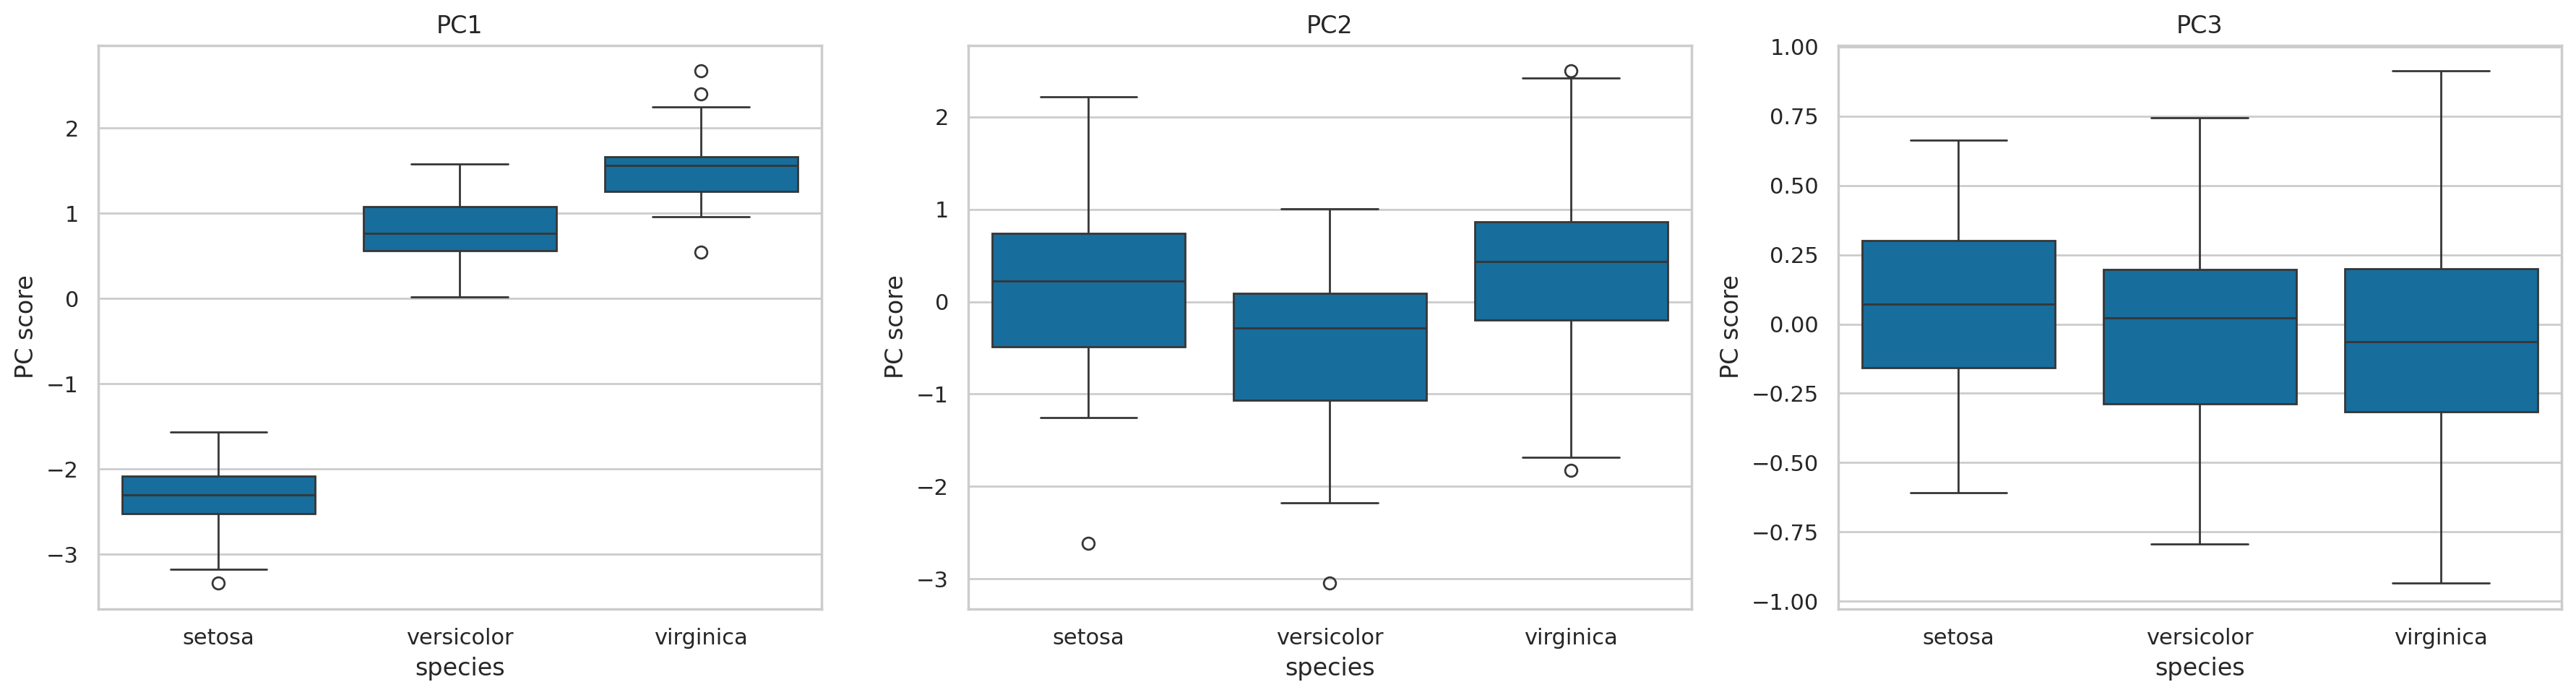

In [4]:
axm = plotting.SubplotsManager(pca.n_components)

for pc, score in pca.scores.items():
    ax = axm.nextax()

    ax.set_title(pc)
    ax.set_ylabel("PC score")
    ax.set_xlabel("species")

    sns.boxplot(x=target, y=score, ax=ax)

axm.show()